In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Лапласа

Про распределение Лапласа можно почитать здесь : https://en.wikipedia.org/wiki/Laplace_distribution . Возьмем следующие параметры распределения: среднее значение, равное 0 и параметр распределения равный 1.  Сгенерируем из него выборку объёма 1000.

In [42]:
r = sts.laplace.rvs(size=1000, scale=1, loc=0)

Получим значения функции теоретической плотности распределения случайной величины:

In [43]:
x = np.linspace(sts.laplace.ppf(0.01), sts.laplace.ppf(0.99), 1000)
pdf = sts.laplace.pdf(x, scale=1, loc=0)

Построим гистограммы выборки и поверх нее график теоретической плотности распределения случайной величины:

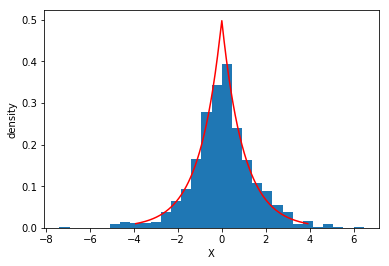

In [44]:
plt.xlabel('X')
plt.ylabel('density')
plt.hist(r, normed=True, histtype='bar',bins=30)
plt.plot(x, pdf, color='Red')
plt.show()

## Теоретическое матожидание и дисперсия случайной величины с распределением Лапласа:

Мы приняли теоретичесоке матожидание равным 0 (оно равно параметру loc что видно по ссылке в вики). По формуле (см. ссылку в вики) дисперсия равна удвоенному квадрату параметра распределения : $ \sigma = 2*b^2 $

In [45]:
sigma = 2*1**2

In [46]:
print(sigma)

2


Оценим распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируем 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

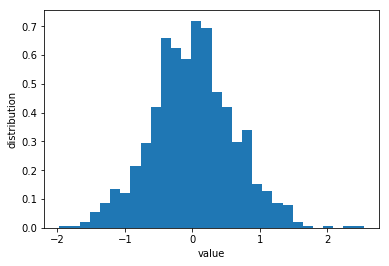

In [47]:
# n = 5
means_5 = []
for i in range(1000):
    choose = sts.laplace.rvs(size=5, scale=1)
    means_5.append(np.mean(choose))
plt.xlabel('value')
plt.ylabel('distribution')
plt.hist(means_5, normed=True, histtype='bar',bins=30)
plt.show()

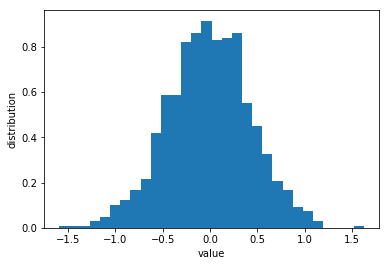

In [48]:
# n = 10
means_10 = []
for i in range(1000):
    choose = sts.laplace.rvs(size=10, scale=1)
    means_10.append(np.mean(choose))
plt.xlabel('value')
plt.ylabel('distribution')    
plt.hist(means_10, normed=True, histtype='bar',bins=30)
plt.show()

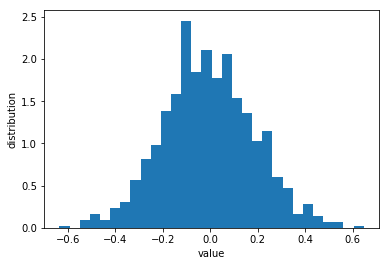

In [49]:
# n = 50
means_50 = []
for i in range(1000):
    choose = sts.laplace.rvs(size=50, scale=1)
    means_50.append(np.mean(choose))
plt.xlabel('value')
plt.ylabel('distribution')
plt.hist(means_50, normed=True, histtype='bar',bins=30)
plt.show()

Используя информацию о среднем и дисперсии исходного распределения, посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 
Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения. Математическое отклонение нормального распределения равно корню из дисперсии. Поставим полученное теоретическое значение дисперсии нашего распределения в формулу ЦПТ:

In [50]:
mo = sigma**0.5
scale_norm5 = mo/(5**0.5)
scale_norm10 = mo/(10**0.5)
scale_norm50 = mo/(50**0.5)
print("n = 5 : " + str(scale_norm5))
print("n = 10 : " + str(scale_norm10))
print("n = 50 : " + str(scale_norm50))

n = 5 : 0.632455532034
n = 10 : 0.4472135955
n = 50 : 0.2


Построим гистограммы распределений выборочных средних с графиками соответствующих им нормальных распределений:

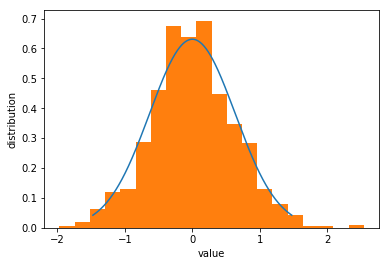

In [51]:
norm_5 = sts.norm(loc=0, scale=scale_norm5)
x_norm5 = np.linspace(norm_5.ppf(0.01),norm_5.ppf(0.99),1000)
pdf = norm_5.pdf(x_norm5)
plt.xlabel('value')
plt.ylabel('distribution')
plt.plot(x_norm5, pdf)
plt.hist(means_5, normed=True, histtype='bar',bins=20)
plt.show()

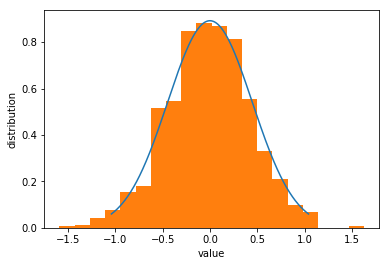

In [52]:
norm_10 = sts.norm(loc=0, scale=scale_norm10)
x_norm10 = np.linspace(norm_10.ppf(0.01),norm_10.ppf(0.99),1000)
pdf = norm_10.pdf(x_norm10)
plt.xlabel('value')
plt.ylabel('distribution')
plt.plot(x_norm10, pdf)
plt.hist(means_10, normed=True, histtype='bar',bins=20)
plt.show()

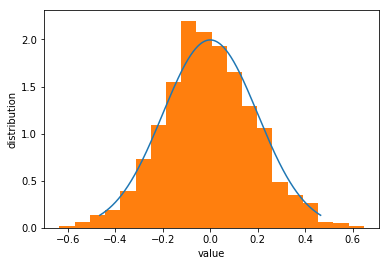

In [53]:
norm_50 = sts.norm(loc=0, scale=scale_norm50)
x_norm50 = np.linspace(norm_50.ppf(0.01),norm_50.ppf(0.99),1000)
pdf = norm_50.pdf(x_norm50)
plt.xlabel('value')
plt.ylabel('distribution')
plt.plot(x_norm50, pdf)
plt.hist(means_50, normed=True, histtype='bar',bins=20)
plt.show()

## Выводы
При уведичении n распределение становится более похожим на нормальное(что следует из ЦПТ). Точность аппроксимации распределения выборочных средних нормальным с ростом n растет.